In [1]:
!pip install pymoo

     ---------------------------------------- 1.2/1.2 MB 8.1 MB/s eta 0:00:00
  Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 239.1/239.1 KB 7.4 MB/s eta 0:00:00
     -------------------------------------- 829.2/829.2 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for autograd, since package 'wheel' is not installed.
Using legacy 'setup.py install' for future, since package 'wheel' is not installed.
  Running setup.py install for future: started
  Running setup.py install for future: finished with status 'done'
  Running setup.py install for autograd: started
  Running setup.py install for autograd: finished with status 'done'


In [2]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
 
class MyProblem(ElementwiseProblem):
 
    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))
 
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2
 
        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8
 
        out["F"] = [f1, f2]
        out["G"] = [g1, g2]
 
 
problem = MyProblem()

In [3]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.factory import get_termination
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
 
#definition of the problem
class MyProblem(ElementwiseProblem):
     
    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))
 
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2
 
        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8
 
        out["F"] = [f1, f2]
        out["G"] = [g1, g2]
 
problem = MyProblem()
 
#parameters
algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)
 
#termination criteria
termination = get_termination("n_gen", 40)
 
#solve problem
res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)
 
#get solutions
X = res.X
F = res.F

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |      40 |  0.00000E+00 |  2.36399E+01 |       1 |            - |            -
    2 |      50 |  0.00000E+00 |  1.15486E+01 |       1 |  0.00000E+00 |            f
    3 |      60 |  0.00000E+00 |  5.277918607 |       1 |  0.00000E+00 |            f
    4 |      70 |  0.00000E+00 |  2.406068542 |       2 |  1.000000000 |        ideal
    5 |      80 |  0.00000E+00 |  0.908316880 |       3 |  0.869706146 |        ideal
    6 |      90 |  0.00000E+00 |  0.264746300 |       3 |  0.00000E+00 |            f
    7 |     100 |  0.00000E+00 |  0.054063822 |       4 |  0.023775686 |        ideal
    8 |     110 |  0.00000E+00 |  0.003060876 |       5 |  0.127815454 |        ideal
    9 |     120 |  0.00000E+00 |  0.00000E+00 |       6 |  0.085921728 |        ideal
   10 |     130 |  0.00000E+00 |  0.00000E+00 |       7 |  0.015715204 |            f
   11 |     140 |  0.00000E+00 |  0.00000E+00 |       

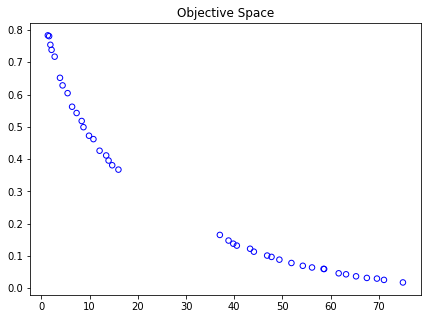

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()